In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('amazon.csv')
# Check for duplicate, none found, no actions needed!
print(data.duplicated().sum())

#creating duplicate dataframe for EDA
cleanData1 = data.copy()

#checking data types of columns
cleanData1.dtypes

0


product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [3]:
#changing data type of discounted_price, actual_price, discount_percentage, rating and rating_count to datatype float
cleanData1['discounted_price'] = cleanData1['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
cleanData1['actual_price'] = cleanData1['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
cleanData1['discount_percentage'] = cleanData1['discount_percentage'].str.replace('%', '').astype(float)
non_numeric_mask = ~cleanData1['rating'].str.match(r'^-?\d*\.?\d+$')
cleanData1.loc[non_numeric_mask, 'rating'] = np.nan
cleanData1['rating'] = cleanData1['rating'].astype(float)
cleanData1['rating_count'] = cleanData1['rating_count'].str.replace(',', '').astype(float)

#adding discounted_amount column for additional insights
cleanData1['discounted_amount'] = cleanData1['actual_price'] - cleanData1['discounted_price']

#checking data types of each column
cleanData1.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
discounted_amount      float64
dtype: object

In [4]:
# for our own reference delete before submitting: no unusual value for rating so i didnt follow that part of the code

In [5]:
#checking for duplicates, no duplicates found
cleanData1[cleanData1.duplicated()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,discounted_amount


In [6]:
#checking for missing values
#one row has column as na, need to remove that row
#ok for rating_count to be 0 since it means that no one has rated the product before current purchaser
cleanData1.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
discounted_amount      0
dtype: int64

In [7]:
#inspecting row with NaN rating value, rating column is indeed NaN
#using the product_link, I was able to find the rating of the missing data (3.9)
cleanData1[cleanData1['rating'].isna()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,discounted_amount
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,16.0,NaN,992.0,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...,400.0


In [8]:
#adding in the rating 3.9 for the unusual row
cleanData1['rating'].fillna(3.9, inplace=True)

#checking if data is placed correctly and no more NaN rows for rating
cleanData1.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
discounted_amount      0
dtype: int64

In [9]:
#adding main_category (the first category in 'category') and sub_category (the last category in 'category') columns to dataframe
cleanData1['main_category'] = cleanData1['category'].astype(str).str.split('|').str[0]
cleanData1['sub_category'] = cleanData1['category'].astype(str).str.split('|').str[-1]

In [10]:
#finding number of unique main_categories. total 9 unique categories
cleanData1['main_category'].nunique()

9

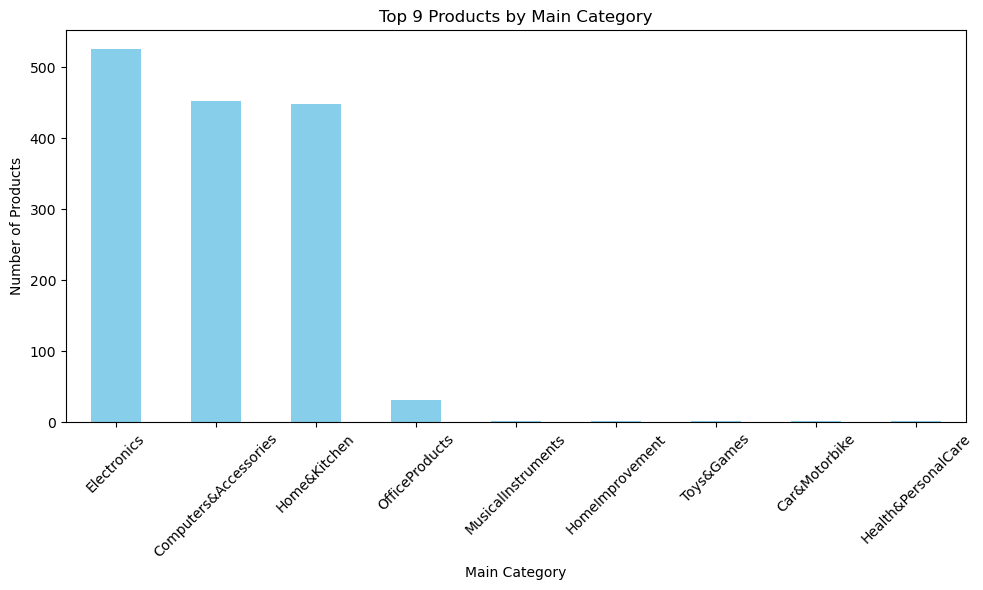

,Main Category,Count
0,Electronics,526
1,Computers&Accessories,453
2,Home&Kitchen,448
3,OfficeProducts,31
4,MusicalInstruments,2
5,HomeImprovement,2
6,Toys&Games,1
7,Car&Motorbike,1
8,Health&PersonalCare,1


In [11]:
#EDA
#Visualising distribution of Main_Category products through bar graph and table. It seems like the majority of products are within the main categories of Electronics, Computers&Accessories and Home&Kitchen.

#plotting bar graph
plt.figure(figsize=(10, 6))
cleanData1['main_category'].value_counts().head(9).plot(kind='bar', color='skyblue')
plt.title('Top 9 Products by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#creating table
category_counts = cleanData1['main_category'].value_counts()
top_9 = category_counts.head(9)
top_9_df = pd.DataFrame({'Main Category': top_9.index, 'Count': top_9.values})
top_9_df

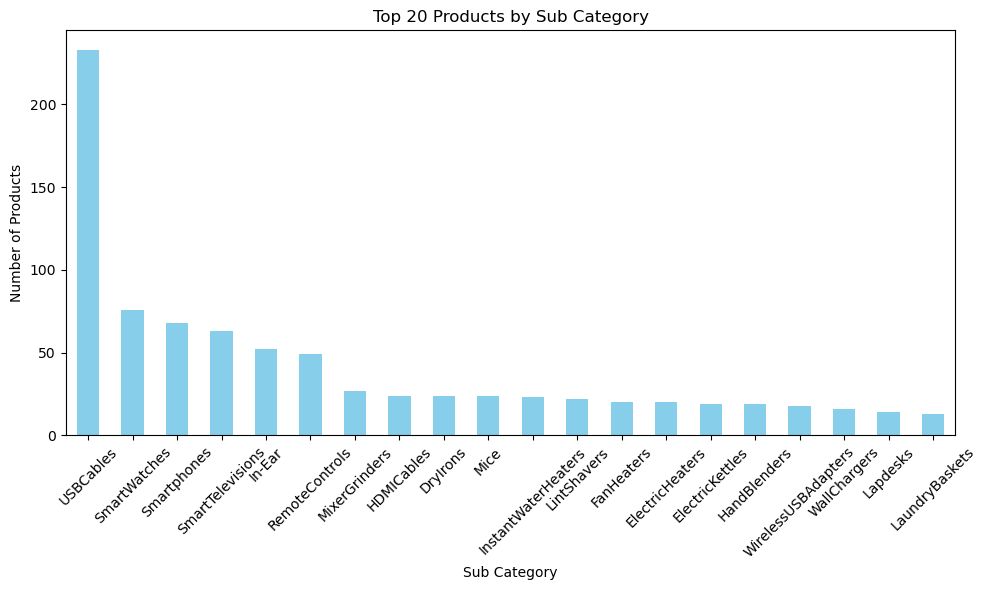

,Sub Category,Count
0,USBCables,233
1,SmartWatches,76
2,Smartphones,68
3,SmartTelevisions,63
4,In-Ear,52
5,RemoteControls,49
6,MixerGrinders,27
7,HDMICables,24
8,DryIrons,24
9,Mice,24


In [12]:
#EDA
#doing the same thing for sub_category

#finding number of unique sub_categories. Total 207 different sub_categories
cleanData1['sub_category'].nunique()

#USBCables is much higher than the rest
#plotting bar graph
plt.figure(figsize=(10, 6))
cleanData1['sub_category'].value_counts().head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Products by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#creating table
category_counts = cleanData1['sub_category'].value_counts()
top_30 = category_counts.head(20)
top_30_df = pd.DataFrame({'Sub Category': top_30.index, 'Count': top_30.values})
top_30_df

Text(0, 0.5, 'Product Name')

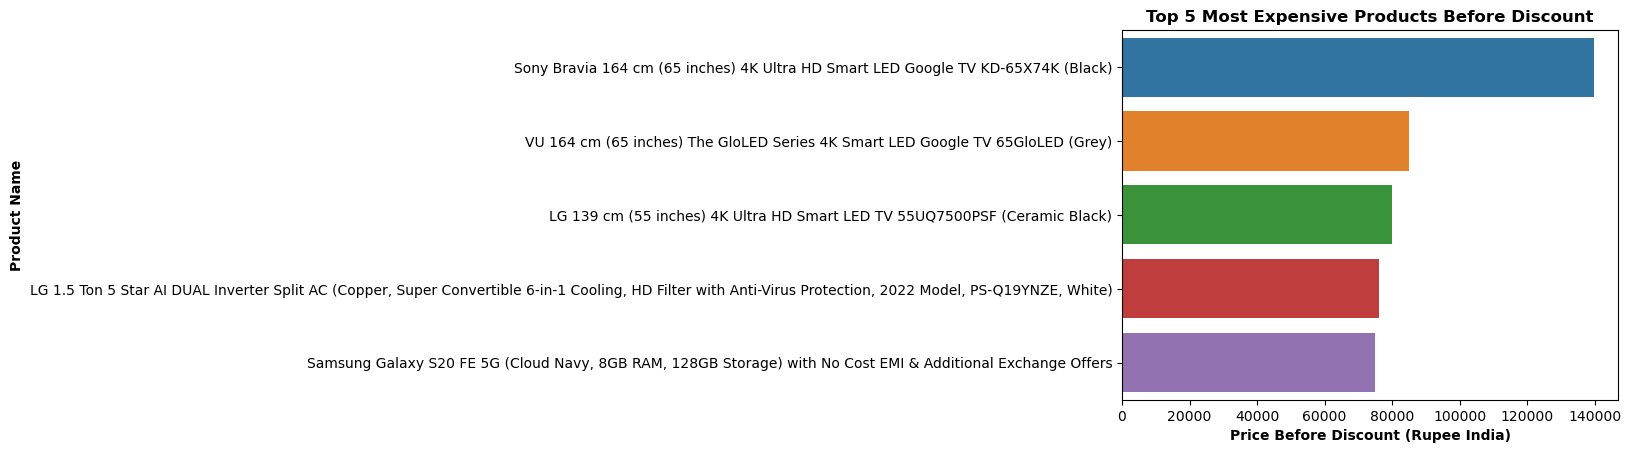

In [13]:
#EDA
#finding top 5 most expensive items before discount
mostex_b = sb.barplot(data=cleanData1.sort_values('actual_price', ascending=False).head(5), x='actual_price', y='product_name')
mostex_b.set_title('Top 5 Most Expensive Products Before Discount', fontweight='bold')
mostex_b.set_xlabel('Price Before Discount (Rupee India)', fontweight='bold')
mostex_b.set_ylabel('Product Name', fontweight='bold')


Text(0, 0.5, 'Product Name')

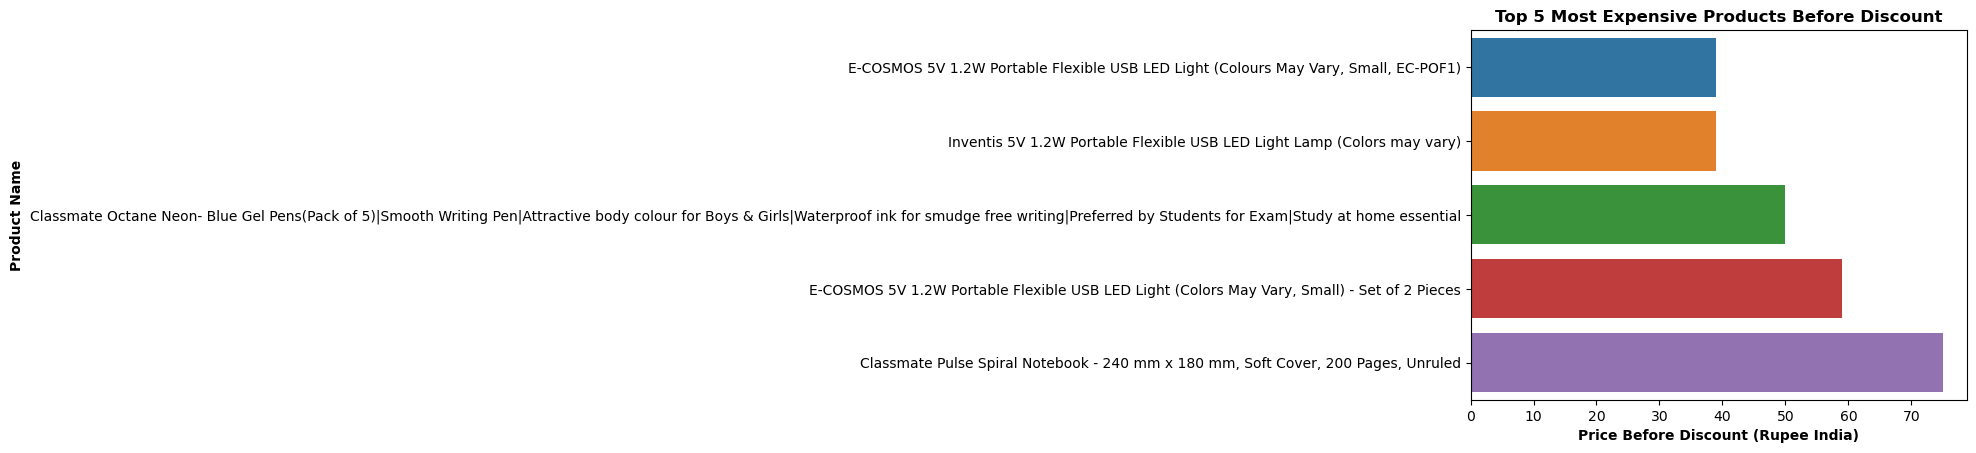

In [14]:
#EDA
#finding top 5 least expensive items before discount
leastex_b = sb.barplot(data=cleanData1.sort_values('actual_price', ascending=True).head(5), x='actual_price', y='product_name')
leastex_b.set_title('Top 5 Most Expensive Products Before Discount', fontweight='bold')
leastex_b.set_xlabel('Price Before Discount (Rupee India)', fontweight='bold')
leastex_b.set_ylabel('Product Name', fontweight='bold')


Text(0, 0.5, 'Product Name')

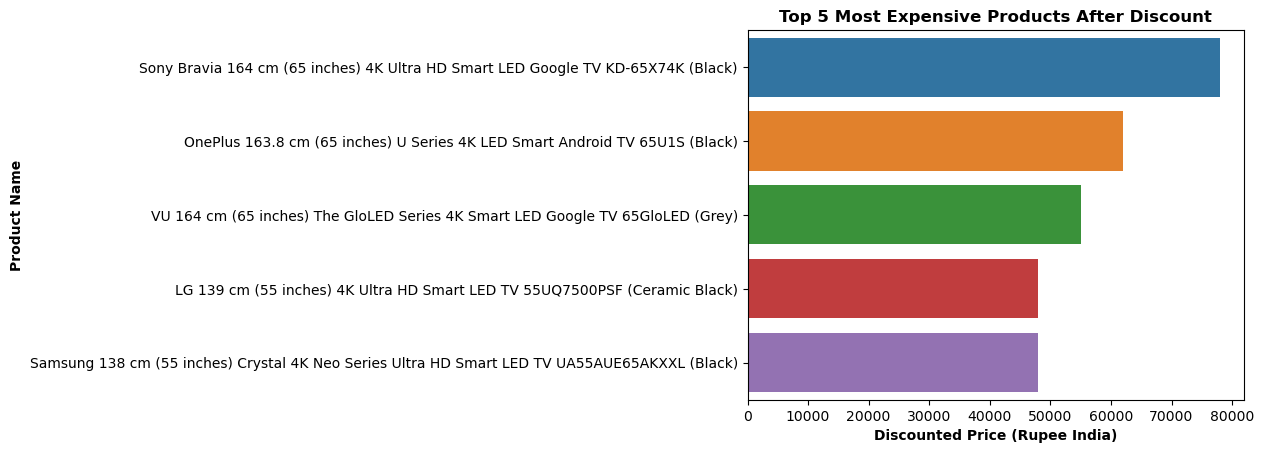

In [15]:
#EDA:
#finding top 5 most expensive items after discount
mostex_a = sb.barplot(data=cleanData1.sort_values('discounted_price', ascending=False).head(5), x='discounted_price', y='product_name')
mostex_a.set_title('Top 5 Most Expensive Products After Discount', fontweight='bold')
mostex_a.set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
mostex_a.set_ylabel('Product Name', fontweight='bold')

Text(0, 0.5, 'Product Name')

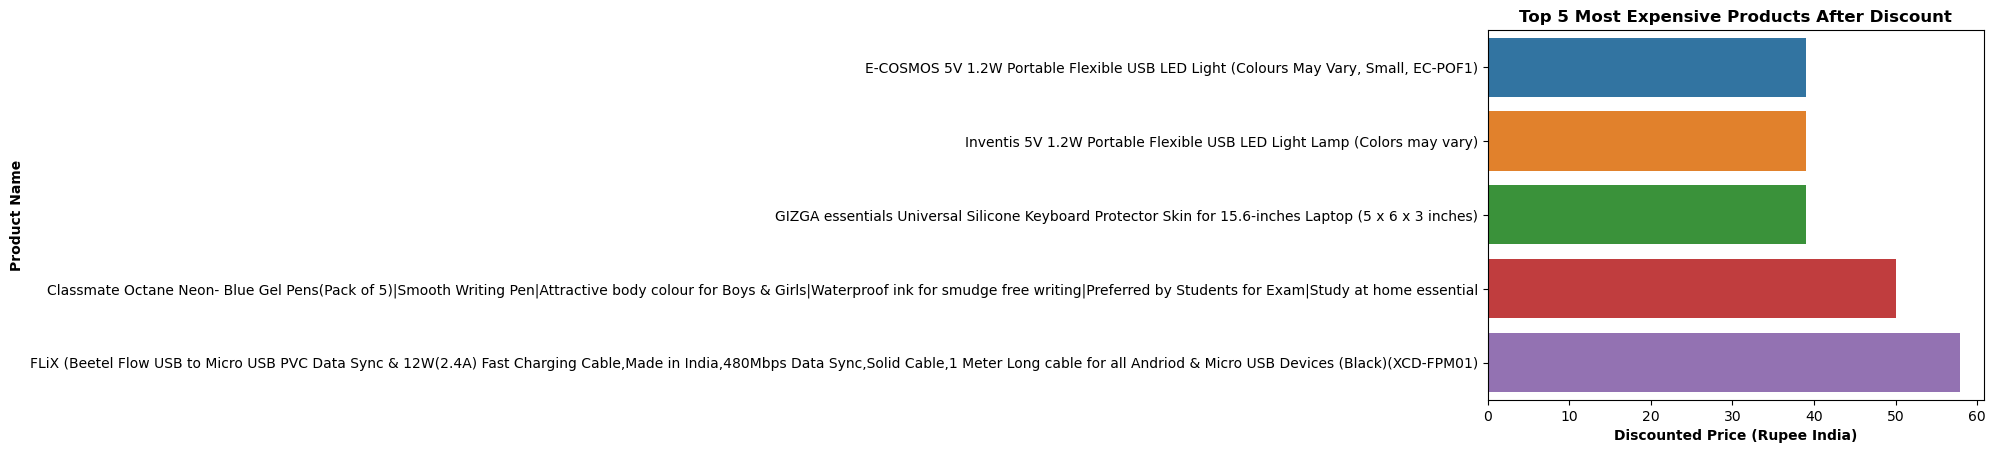

In [16]:
#EDA:
#finding top 5 least expensive items after discount
mostex_a = sb.barplot(data=cleanData1.sort_values('discounted_price', ascending=True).head(5), x='discounted_price', y='product_name')
mostex_a.set_title('Top 5 Most Expensive Products After Discount', fontweight='bold')
mostex_a.set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
mostex_a.set_ylabel('Product Name', fontweight='bold')

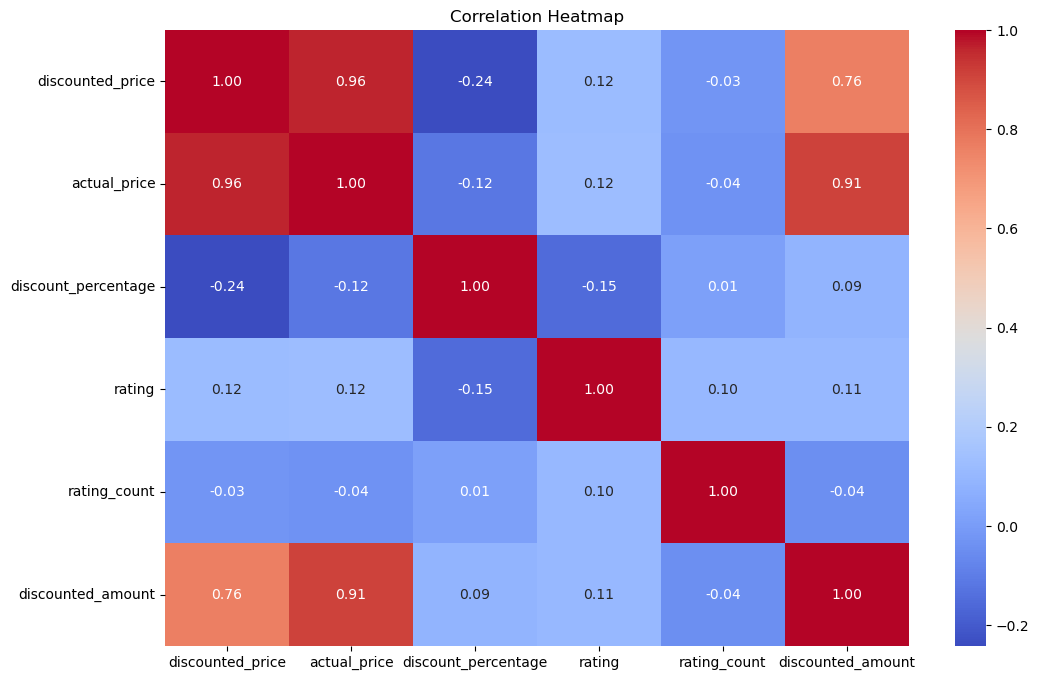

In [17]:
#EDA
#Finding correlation between different columns

cor = cleanData1[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'discounted_amount']]

plt.figure(figsize=(12, 8))
sb.heatmap(cor.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()
